# 0. Install Dependencies

In [7]:
pip install neuralprophet pandas matplotlib

  Obtaining dependency information for neuralprophet from https://files.pythonhosted.org/packages/78/f8/a79434cd7a9437ccc3789b908efd3ff12d71fbb5ec30ecb5f375bf54fab0/neuralprophet-0.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/71/00/6beaeeba7f075d15ea167a5caa039b861e58ff2f58a5b659abb9b544c8f6/pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/50/ce/a6bc93f7a44dd1fd23698698e369e141f4f24e7098d0a5937808afee3f5e/matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for captum>=0.6.0 from https://files.pythonhosted.org/packages/e1/76/b21bfd2c35cab2e9a4b68b1977f7488c246c8cffa31e3361ee7610e8b5af/captum-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.41 from https://files.pythonhosted.org/packages/62/65/0c1b00ba459c6b4cfacdfb060e21160320b60f0fb3ebc97bca982f1db861

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [24]:
from neuralprophet import NeuralProphet

In [25]:
import pickle

In [26]:
import pandas as pd

In [27]:
from matplotlib import pyplot as plt

# 1. Read and Process Data

In [28]:
#Read the csv file and save it into a dataframe
df = pd.read_csv('canada.csv')
df.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


In [29]:
#Remove all the NaN values and save the modifications with inplace set to True
df.dropna(inplace=True)

In [30]:
#Check the data types because Neural Prophet needs the Date to be type Date and not object
df.dtypes

LOCAL_DATE                         object
MEAN_TEMPERATURE_CALGARY          float64
TOTAL_PRECIPITATION_CALGARY       float64
MEAN_TEMPERATURE_EDMONTON         float64
TOTAL_PRECIPITATION_EDMONTON      float64
MEAN_TEMPERATURE_HALIFAX          float64
TOTAL_PRECIPITATION_HALIFAX       float64
MEAN_TEMPERATURE_MONCTON          float64
TOTAL_PRECIPITATION_MONCTON       float64
MEAN_TEMPERATURE_MONTREAL         float64
TOTAL_PRECIPITATION_MONTREAL      float64
MEAN_TEMPERATURE_OTTAWA           float64
TOTAL_PRECIPITATION_OTTAWA        float64
MEAN_TEMPERATURE_QUEBEC           float64
TOTAL_PRECIPITATION_QUEBEC        float64
MEAN_TEMPERATURE_SASKATOON        float64
TOTAL_PRECIPITATION_SASKATOON     float64
MEAN_TEMPERATURE_STJOHNS          float64
TOTAL_PRECIPITATION_STJOHNS       float64
MEAN_TEMPERATURE_TORONTO          float64
TOTAL_PRECIPITATION_TORONTO       float64
MEAN_TEMPERATURE_VANCOUVER        float64
TOTAL_PRECIPITATION_VANCOUVER     float64
MEAN_TEMPERATURE_WHITEHORSE       

In [31]:
#Create a new data frame with the Date, Temperature and Precipitation for Toronto, it's the only city we will explore in this project
data = df[['LOCAL_DATE', 'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO']]
data.head()

,LOCAL_DATE,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO
7624,15-Nov-1960 00:00:00,10.9,24.6
7625,16-Nov-1960 00:00:00,11.7,0.5
7626,17-Nov-1960 00:00:00,5.6,0.0
7627,18-Nov-1960 00:00:00,2.8,0.0
7628,19-Nov-1960 00:00:00,3.6,0.0


In [32]:
#Change the name of the columns
data.columns = ['Date', 'Temp', 'Prec']
data.head()

,Date,Temp,Prec
7624,15-Nov-1960 00:00:00,10.9,24.6
7625,16-Nov-1960 00:00:00,11.7,0.5
7626,17-Nov-1960 00:00:00,5.6,0.0
7627,18-Nov-1960 00:00:00,2.8,0.0
7628,19-Nov-1960 00:00:00,3.6,0.0


In [33]:
#Change the data type of Date to datetime
data.Date = pd.to_datetime(data.Date)
data.dtypes

WARNING - (py.warnings._showwarnmsg) - C:\Users\Algor Lombako\AppData\Local\Temp\ipykernel_2488\202734467.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Date    datetime64[ns]
Temp           float64
Prec           float64
dtype: object

In [34]:
data.head()

,Date,Temp,Prec
7624,1960-11-15,10.9,24.6
7625,1960-11-16,11.7,0.5
7626,1960-11-17,5.6,0.0
7627,1960-11-18,2.8,0.0
7628,1960-11-19,3.6,0.0


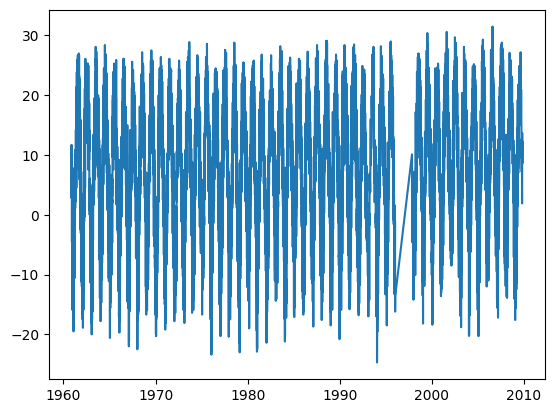

In [35]:
#Plot the data frame to see the trend
plt.plot(data.Date, data.Temp)
plt.show()

In [36]:
#Remove Precipitation column as Neural Prophet only needs two columns
data.drop('Prec', axis=1, inplace=True)
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Algor Lombako\AppData\Local\Temp\ipykernel_2488\2950737632.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,Date,Temp
7624,1960-11-15,10.9
7625,1960-11-16,11.7
7626,1960-11-17,5.6
7627,1960-11-18,2.8
7628,1960-11-19,3.6


In [37]:
#Reset the index values to make them start from 0 and save the modification
data.reset_index(drop=True, inplace=True)

In [38]:
#Change the name of the remaining columns as Neural Prophet want them to be names 'ds' and 'y'
data.columns = ['ds','y']
data

,ds,y
0,1960-11-15,10.9
1,1960-11-16,11.7
2,1960-11-17,5.6
3,1960-11-18,2.8
4,1960-11-19,3.6
...,...,...
16771,2009-10-24,9.9
16772,2009-10-25,8.6
16773,2009-10-26,8.8
16774,2009-10-27,12.3


# 2. Train Model

In [39]:
#Save the model in a variable
m = NeuralProphet()

In [40]:
#Fit the model in a daily basis 'D' for 10 epochs
model = m.fit(data, freq='D', epochs=10)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.07% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will 

Epoch 10: 100%|██████████| 10/10 [00:00<00:00, 13.44it/s, loss=0.0105, v_num=1, MAE=3.570, RMSE=4.500, Loss=0.0108, RegLoss=0.000]  


# 3. Forecast

In [41]:
#Make the prediction and display the forecast
future = m.make_future_dataframe(data, periods=1200)
forecast = m.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.07% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequen

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``

Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 283.87it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2009-10-30,None,7.592873,8.779732,-1.246955,0.060097
1,2009-10-31,None,7.245071,8.779713,-1.417791,-0.116852
2,2009-11-01,None,7.050102,8.779697,-1.589332,-0.140263
3,2009-11-02,None,7.112703,8.779682,-1.762133,0.095153
4,2009-11-03,None,6.942690,8.779663,-1.935773,0.098798


In [42]:
#Plot the forecast to see the trend
m.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\Algor Lombako\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




![Alt Text](newplot.png)

In [43]:
#Had to use an image because the interactive plot didn't show on Github

In [44]:
#We can see the season trend is respected, as we have low temperatures during the start of the year (winter) 
#and high temperatures in the middle of the year (summer)

# 4. Save Model

In [45]:
#Save the model in binary so that I don't need to train the model every time
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)